<a href="https://colab.research.google.com/github/yAsh18C/dsba/blob/main/climate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

POLLUTION AFECTING CLIMATE CHANGE

IMPORT LIBRARY

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import sklearn
import numpy as np

IMPORT DATA

In [ ]:
co2_df = pd.read_csv('https://raw.githubusercontent.com/ludobouan/linear-regression-sklearn/master/global_co2.csv')
temp_df = pd.read_csv('https://raw.githubusercontent.com/ludobouan/linear-regression-sklearn/master/annual_temp.csv')
co2_df.head()

,Year,Total,Gas Fuel,Liquid Fuel,Solid Fuel,Cement,Gas Flaring,Per Capita
0,1751,3,0,0,3,0,0,NaN
1,1752,3,0,0,3,0,0,NaN
2,1753,3,0,0,3,0,0,NaN
3,1754,3,0,0,3,0,0,NaN
4,1755,3,0,0,3,0,0,NaN


DESCRIBE DATA

In [ ]:
temp_df.head()

,Source,Year,Mean
0,GCAG,2015,0.8990
1,GISTEMP,2015,0.8700
2,GCAG,2014,0.7402
3,GISTEMP,2014,0.7500
4,GCAG,2013,0.6687


In [ ]:
co2_df.shape

(260, 8)

In [ ]:
temp_df.shape

(272, 3)

In [ ]:
# Clean data
co2_df = co2_df.iloc[:,:2]                     # Keep only total CO2
co2_df = co2_df[co2_df['Year'] >= 1960]   # Keep only 1960 - 2010
co2_df.columns=['Year','CO2']                
co2_df = co2_df.reset_index(drop=True)            

temp_df = temp_df[temp_df.Source != 'GISTEMP']                              # Keep only one source
temp_df.drop('Source', inplace=True, axis=1)                                # Drop name of source
temp_df = temp_df.reindex(index=temp_df.index[::-1])                        
temp_df = temp_df[(temp_df['Year'] >= 1960) & (temp_df['Year'] <= 2010)]   # Keep only 1960 - 2010
temp_df.columns=['Year','Temperature']                                      
temp_df = temp_df.reset_index(drop=True)                                            

print(co2_df.head())
print(temp_df.head())

   Year   CO2
0  1960  2569
1  1961  2580
2  1962  2686
3  1963  2833
4  1964  2995
   Year  Temperature
0  1960       0.0252
1  1961       0.0818
2  1962       0.0924
3  1963       0.1100
4  1964      -0.1461


In [ ]:
climate_change_df = pd.concat([co2_df, temp_df.Temperature], axis=1)
climate_change_df.head()

,Year,CO2,Temperature
0,1960,2569,0.0252
1,1961,2580,0.0818
2,1962,2686,0.0924
3,1963,2833,0.1100
4,1964,2995,-0.1461


In [ ]:
climate_change_df.shape

(51, 3)

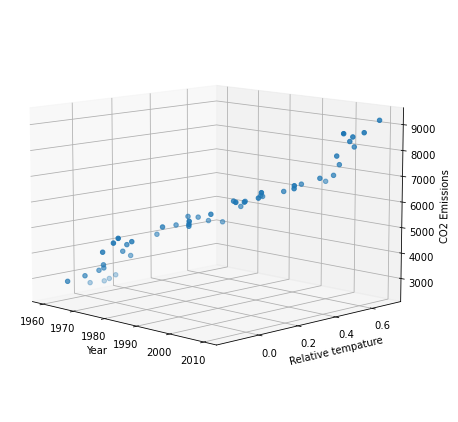

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
fig.set_size_inches(12.5, 7.5)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs=climate_change_df['Year'], ys=climate_change_df['Temperature'], zs=climate_change_df['CO2'])

ax.set_ylabel('Relative tempature'); ax.set_xlabel('Year'); ax.set_zlabel('CO2 Emissions')
ax.view_init(10, -45)

DATA VISUALIZATION

Text(0, 0.5, 'Relative temperature')

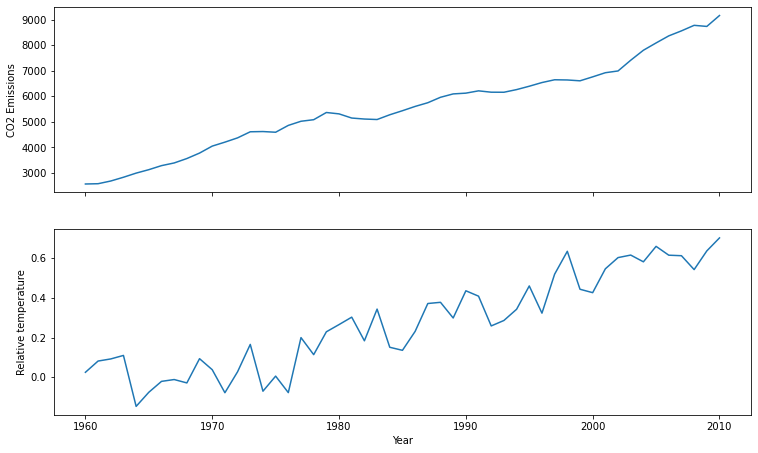

In [ ]:
f, axarr = plt.subplots(2, sharex=True)
f.set_size_inches(12.5, 7.5)
axarr[0].plot(climate_change_df['Year'], climate_change_df['CO2'])
axarr[0].set_ylabel('CO2 Emissions')
axarr[1].plot(climate_change_df['Year'], climate_change_df['Temperature'])
axarr[1].set_xlabel('Year')
axarr[1].set_ylabel('Relative temperature')

In [ ]:
from sklearn.model_selection import train_test_split
X = climate_change_df['Year']
Y = climate_change_df[['CO2', 'Temperature']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
print(X_train.shape)
print(y_train.shape)
reg.fit(X_train.values.reshape(-1,1), y_train)

(45,)
(45, 2)


LinearRegression()

In [ ]:
print('Score: ', reg.score(X_test.values.reshape(-1,1), y_test))

Score:  0.8877342821732441


In [ ]:
x_line = np.arange(1960,2011).reshape(-1,1)
p = reg.predict(x_line).T

Text(0, 0.5, 'Relative temperature')

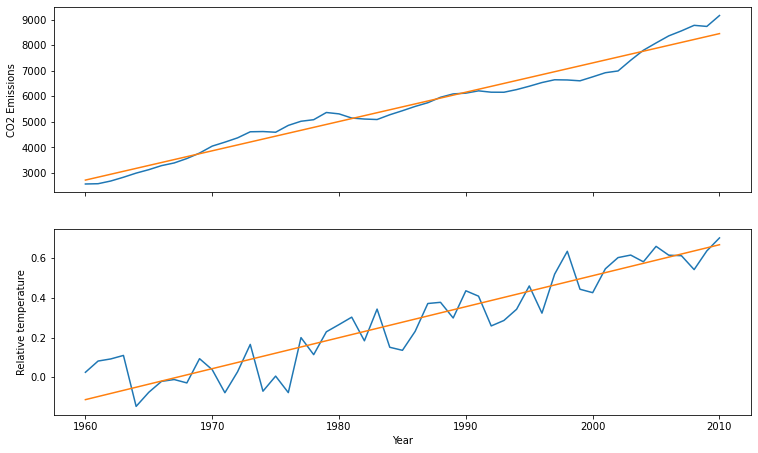

In [ ]:
f, axarr = plt.subplots(2, sharex=True)
f.set_size_inches(12.5, 7.5)
axarr[0].plot(climate_change_df['Year'], climate_change_df['CO2'])
axarr[0].plot(x_line, p[0])
axarr[0].set_ylabel('CO2 Emissions')
axarr[1].plot(climate_change_df['Year'], climate_change_df['Temperature'])
axarr[1].plot(x_line, p[1])
axarr[1].set_xlabel('Year')
axarr[1].set_ylabel('Relative temperature')